<a href="https://colab.research.google.com/github/HaidyTalaat/Hotel-Reservations-Prediction-End-to-End-DataScience-Project/blob/main/Hotel_Reservation_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Reservations Classification**

**This notebook contains a complete end-to-end Data Science project where I explored, cleaned, visualized, and modeled Hotel Reservations Data.**

# **Table of Contents**

1. [Problem Statement](#0.1)
2. [Importing libraries](#2)
3. [Exploring dataset](#3)
4. [Data Visualization](#4)
5. [Exploratory Data Analysis](#5)
6. [Data Preprocessing](#6)
7. [Outlier Detection](#7)
8. [Correlation between Features](#8)
9. [Features & Target Variables](#9)
10. [Building Machine Learning Models Without Feature Scaling](#10)
11. [Feature Scaling](#11)
12. [Building Machine Learning Models & Select Best Model After Feature Scaling](#12)
13. [Fine Tuning the best ML Model](#13)
14. [Modeling with Feature Selection](#14)
15. [Conclusion](#15)



# **Problem Statement:** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)<br>
**The aim of this project is to predict if the customer is going to honor the reservation or cancel it ?**


> **About Dataset:**<br>


*   Booking_ID: unique identifier of each booking.

*   no_of_adults: Number of adults.
*  no_of_children: Number of Children
*   no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
*   no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
*   type_of_meal_plan: Type of meal plan booked by the customer.
*   required_car_parking_space: Does the customer require a car parking space? (0 - 1).
*   room_type_reserved: Type of room reserved by the customer.
*   lead_time: Number of days between the date of booking and the arrival date.
*   arrival_year: Year of arrival date.
*   arrival_month: Month of arrival date.
*   arrival_date: Date of the month.
*   market_segment_type: Market segment designation.
*   repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes).
*   no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking.
*   no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking.
*   avg_price_per_room: Average price per day of the reservation
*   no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
*   booking_status: Flag indicating if the booking was canceled or not.


















.

**Link of Dataset : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset**

# **Importing libraries:** <a class="anchor" id="2"></a>
[Table of Contents](#0.2)

**First Install Required Dependices**

In [ ]:
!pip install plotly cufflinks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00


In [ ]:
import numpy as np

import pandas as pd
import cufflinks as cf
import plotly.offline
import plotly.express as px



**As there was a problem in showing the plotly plots so make sure that render mode of plots is shown in `colab`**

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

**To hide Warnings**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Exploring Dataset:** <a class="anchor" id="3"></a>
[Table of Contents](#0.3)

In [ ]:
df=pd.read_csv('Hotel Reservations.csv')


In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
categorical_col=[cat for cat in df.columns if df[cat].dtype=='O']
print('There are {} Categorical Column '.format(len(categorical_col)))
print(categorical_col)

There are 5 Categorical Column 
['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [ ]:
numerical_col=[num for num in df.columns if df[num].dtype!='O']
print('There are {} Numerical Column '.format(len(numerical_col)))
print(numerical_col)

There are 14 Numerical Column 
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


# **Checking Null values**

In [ ]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

 ---
# **Observation:**
-There's no null values in any column of dataset

---

**Checking if there are Duplicated Rows**

In [ ]:
df.duplicated().sum()


np.int64(0)

# **Data Visualization** <a class="anchor" id="4"></a>
[Table of Contents](#0.4)

# **First explore categorical columns**

**1. Explore target Column `booking_status`**

In [ ]:
print(df['booking_status'].value_counts())
print(df['booking_status'].unique())
print('There are {} unique labels'.format(df['booking_status'].nunique()))

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
['Not_Canceled' 'Canceled']
There are 2 unique labels


In [ ]:
pio.renderers.default = 'colab'
fig = px.histogram(df, x="booking_status",color_discrete_sequence=px.colors.qualitative.Pastel,title='Booking Status')
fig.show()


**2. Explore `Types of Meals` Column**

In [ ]:
print(df['type_of_meal_plan'].unique())
print('There are {} unique labels'.format(df['type_of_meal_plan'].nunique()))

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
There are 4 unique labels


In [ ]:
print(df['type_of_meal_plan'].value_counts())

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64


In [ ]:
fig=px.pie(df,names='type_of_meal_plan',title='Type of Meal Plan')
fig.show()

**3. Explore `Types of Reserved Room` Column**

In [ ]:
print('There are {} unique labels'.format(df['room_type_reserved'].nunique()))
print(df['room_type_reserved'].unique())


There are 7 unique labels
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


In [ ]:
print(df['room_type_reserved'].value_counts())

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


In [ ]:
fig=px.bar(df,x='room_type_reserved',title='Room Type Reserved',color='room_type_reserved')
fig.show()

In [ ]:
print('There are {} unique labels : '.format(df['market_segment_type'].nunique()))
print(df['market_segment_type'].unique())


There are 5 unique labels : 
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [ ]:
print(df['market_segment_type'].value_counts())

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


In [ ]:
fig=px.pie(df,names='market_segment_type',title='Distribution of Market Segment Type')
fig.show()

# **Second Explore Numerical Columns**

**1. Check `No of Adults` Column**

In [ ]:
print('There are {} unique labels'.format(df['no_of_adults'].nunique()))
print(df['no_of_adults'].unique())


There are 5 unique labels
[2 1 3 0 4]


In [ ]:
df['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

In [ ]:
fig=px.histogram(df,x='no_of_adults',title='Distribution of No.Adults',color='no_of_adults')
fig.show()

 **2. Check `Lead Time` Column which indicates the number of days between the date of booking and the arrival date**

In [ ]:
print('There are {} unique labels :'.format(df['lead_time'].nunique()))
print(df['lead_time'].unique())


There are 352 unique labels :
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418 156  58
 433 111 195 119  59  78 335 103  70  76 144  49  77  36  79  21  33 164
 152  43 102  71 209  93  53 302 239  45 167 113  84   9 166 174  61 151
  52  67 282  38 175  89 133  65  66  50 159 386 115 237 125  91  29 221
 213 198  75 180 236 120 230  63 136 309 157 268 217  94 305  98  42 154
 330 137 184 232 304 114 257 265 191 101 259 149 170 271 207 108 210 222
 296 194 145 153 275 158 301 349 200 315 181 263 176 141 270 150 359 244
 219 142 138 276 178 

In [ ]:
print(df['lead_time'].value_counts().head(10).index)

Index([0, 1, 2, 3, 4, 5, 6, 8, 7, 12], dtype='int64', name='lead_time')


In [ ]:
fig=px.histogram(df,x='lead_time',title='Distribution of Lead Time')
fig.show()

**3. Check No. Childern` Column**

In [ ]:
print(df['no_of_children'].unique())
print('There are {} unique labels'.format(df['no_of_children'].nunique()))

[ 0  2  1  3 10  9]
There are 6 unique labels


In [ ]:
df['no_of_children'].value_counts()
# 3,9,10 are outliers

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [ ]:
fig=px.histogram(df,x='no_of_children',title='Distribution of No.Children',color='no_of_children')
fig.show()


**4. Check the distribution of `Repeated Guest` Column**

In [ ]:
print('There are {} unique labels'.format(df['repeated_guest'].nunique()))
print(df['repeated_guest'].unique())


There are 2 unique labels
[0 1]


In [ ]:
print(df['repeated_guest'].value_counts())


repeated_guest
0    35345
1      930
Name: count, dtype: int64


In [ ]:
fig=px.pie(df,names='repeated_guest',title='Repeated Guest')
fig.show()
# not balanced at all

**5. Explore the distribution of `No. of Week Nights` Column**




In [ ]:
print(df['no_of_week_nights'].unique())
print('There are {} unique labels'.format(df['no_of_week_nights'].nunique()))

[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
There are 18 unique labels


In [ ]:
print(df['no_of_week_nights'].value_counts())
# from 6 to 16 seems as outliers

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64


In [ ]:
fig=px.histogram(df,x='no_of_week_nights',title='Distribution of No.Week Nights',color='no_of_week_nights')
fig.show()

**6. Explore the distribution of `No. of Weekend Nights` Column**




In [ ]:
print(df['no_of_weekend_nights'].unique())
print('There are {} unique labels'.format(df['no_of_weekend_nights'].nunique()))

[1 2 0 4 3 6 5 7]
There are 8 unique labels


In [ ]:
print(df['no_of_weekend_nights'].value_counts())
#from 3 to 7 seems as outliers

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64


In [ ]:
fig=px.histogram(df,x='no_of_weekend_nights',title='Distribution of No.Weekend Nights',color='no_of_weekend_nights')
fig.show()

**7. Explore if customer require car parking or not `Car_parking_space ` Column**




In [ ]:
print(df['required_car_parking_space'].unique())
print('There are {} unique labels'.format(df['required_car_parking_space'].nunique()))

[0 1]
There are 2 unique labels


In [ ]:
print(df['required_car_parking_space'].value_counts())
# column isn't balanced at all

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64


In [ ]:
fig = px.histogram(df,x='required_car_parking_space',title='Distribution of required_car_parking_space',color='required_car_parking_space')
fig.show()

**8. Explore the distribution of all 3 Columns `arrival_date`,`arrival_year`,`arrival_month`to check the booking date of all customers**




In [ ]:
print(df['arrival_year'].unique())
print('There are {} unique labels'.format(df['arrival_year'].nunique()))

[2017 2018]
There are 2 unique labels


In [ ]:
print(df['arrival_year'].value_counts())
# not balanced

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64


In [ ]:
print(df['arrival_month'].unique())
print('There are {} unique labels'.format(df['arrival_month'].nunique()))

[10 11  2  5  4  9 12  7  6  8  3  1]
There are 12 unique labels


In [ ]:
df['arrival_month'].value_counts()
# values aren't considered as outlier

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

In [ ]:
fig = px.histogram(df,x='arrival_month',title='Distribution of arrival_month',color='arrival_month')
fig.show()


In [ ]:
print(df['arrival_date'].unique())
print('There are {} unique labels'.format(df['arrival_date'].nunique()))

[ 2  6 28 20 11 13 15 26 18 30  5 10  4 25 22 21 19 17  7  9 27  1 29 16
  3 24 14 31 23  8 12]
There are 31 unique labels


In [ ]:
print(df['arrival_date'].value_counts())
# no outliers

arrival_date
13    1358
17    1345
2     1331
19    1327
4     1327
16    1306
20    1281
6     1273
15    1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
25    1146
26    1146
1     1133
9     1130
28    1129
7     1110
24    1103
3     1098
11    1098
10    1089
27    1059
22    1023
23     990
31     578
Name: count, dtype: int64


# **Amazing Insights:**<ar>


1.   **`2018` Year was a special year for hotel as there was `29761` reservations made.**
2.   **`Octobor` Month was a significant month for Hotel along 2 years as the most reservations made durng it.**




**9. Show Distribution of price for each room using Vilion plot**

In [ ]:
print(df['avg_price_per_room'].unique())
print('There are {} unique labels'.format(df['avg_price_per_room'].nunique()))

[ 65.   106.68  60.   ... 118.43 137.25 167.8 ]
There are 3930 unique labels


In [ ]:
df['avg_price_per_room'].value_counts()

avg_price_per_room
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
105.21      1
75.81       1
147.93      1
144.68      1
66.59       1
Name: count, Length: 3930, dtype: int64

In [ ]:
fig = px.violin(df,y='avg_price_per_room',points='all',title='Violin Plot of Average Price Per Room')
fig.show()

**10. Check the number of `previous_bookings_not_canceled` and `previous_bookings canceled`**

In [ ]:
print(df['no_of_previous_bookings_not_canceled'].unique())
print('There are {} unique labels'.format(df['no_of_previous_bookings_not_canceled'].nunique()))

[ 0  5  1  3  4 12 19  2 15 17  7 20 16 50 13  6 14 34 18  8 10 23 11 49
 47 53  9 33 22 24 52 21 48 28 39 25 31 38 26 51 42 37 35 56 44 27 32 55
 45 30 57 46 54 43 58 41 29 40 36]
There are 59 unique labels


In [ ]:
df['no_of_previous_bookings_not_canceled'].value_counts()
# all are outliers except 0

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
9        19
10       19
11       15
12       12
14        9
15        8
16        7
13        7
17        6
19        6
20        6
18        6
21        6
22        6
25        3
24        3
23        3
27        3
30        2
32        2
44        2
29        2
48        2
28        2
31        2
26        2
53        1
47        1
49        1
34        1
50        1
39        1
33        1
52        1
35        1
37        1
42        1
51        1
38        1
56        1
45        1
55        1
57        1
46        1
43        1
54        1
58        1
41        1
40        1
36        1
Name: count, dtype: int64

In [ ]:
print(df['no_of_previous_cancellations'].unique())
print('There are {} unique labels'.format(df['no_of_previous_cancellations'].nunique()))

[ 0  3  1  2 11  4  5 13  6]
There are 9 unique labels


In [ ]:
print(df['no_of_previous_cancellations'].value_counts())
# all are outliers except 0

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64


In [ ]:
print(df['no_of_special_requests'].unique())
print('There are {} unique labels'.format(df['no_of_special_requests'].nunique()))

[0 1 3 2 4 5]
There are 6 unique labels


In [ ]:
print(df['no_of_special_requests'].value_counts())
# 3 to 5 outliers

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64


**11. Show Distribution of `Special Requests` Column**

In [ ]:
fig=px.pie(df,names='no_of_special_requests',title='Distribution of no_of_special_requests')
fig.show()

# **Exploratary Data Analysis(EDA):** <a class="anchor" id="5"></a>
[Table of Contents](#0.5)

**1. Showing what is the most Reserved Room Type**

In [ ]:
price_per_room_type=df.groupby('room_type_reserved')['avg_price_per_room'].sum().sort_values(ascending=False)
price_per_room_type


room_type_reserved
Room_Type 1    2698188.31
Room_Type 4     758865.28
Room_Type 6     176017.60
Room_Type 2      60791.20
Room_Type 5      32789.41
Room_Type 7      24521.33
Room_Type 3        515.75
Name: avg_price_per_room, dtype: float64

In [ ]:
fig=px.bar(price_per_room_type,title='Average Price Per Room Type')
fig.show()

**2. Finding the relationship between 2 Categorical Columns : `Room Type`,`Meal Type` to show what is the most required meal for each room.**

In [ ]:
crosstab = pd.crosstab(df['type_of_meal_plan'], df['room_type_reserved'])
crosstab

room_type_reserved  Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
type_of_meal_plan                                                        
Meal Plan 1               20157          653            5         5748   
Meal Plan 2                2934           16            0          273   
Meal Plan 3                   1            0            0            1   
Not Selected               5038           23            2           35   

room_type_reserved  Room_Type 5  Room_Type 6  Room_Type 7  
type_of_meal_plan                                          
Meal Plan 1                 242          878          152  
Meal Plan 2                  14           66            2  
Meal Plan 3                   0            0            3  
Not Selected                  9           22            1

**3. Showing which room type has the most number of special requests**

In [ ]:
df['no_of_special_requests'].nunique()

6

In [ ]:
df['no_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [ ]:
special_requests_per_room_type=df.groupby('room_type_reserved')['no_of_special_requests'].sum().sort_values(ascending=False)
special_requests_per_room_type

room_type_reserved
Room_Type 1    15691
Room_Type 4     5102
Room_Type 6      874
Room_Type 2      527
Room_Type 7      194
Room_Type 5       89
Room_Type 3        1
Name: no_of_special_requests, dtype: int64

In [ ]:
fig=px.line(special_requests_per_room_type,title='Special Requests Per Room Type')
fig.show()

**4.Relationship Between Market Segment Type and Booking Status**

In [ ]:
ct = pd.crosstab(df['market_segment_type'], df['booking_status'], normalize='index')
ct

booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation             0.296000      0.704000
Complementary        0.000000      1.000000
Corporate            0.109073      0.890927
Offline              0.299487      0.700513
Online               0.365081      0.634919

In [ ]:
ct = ct.reset_index().melt(id_vars='market_segment_type',var_name='booking_status',value_name='proportion')
fig = px.bar(
    ct,
    x='market_segment_type',
    y='proportion',
    color='booking_status',
    barmode='group',
    title='Proportion of Booking Status per Market Segment',
    labels={'market_segment_type': 'Market Segment', 'proportion': 'Proportion'},
    color_discrete_map={'Canceled': 'lightpink', 'Not_Canceled': 'skyblue'}
)
fig.show()

The `Complementary` segment has the lowest cancellation rate, while `Aviation` has the highest.

**5.show how many booking in each month**


In [ ]:
df.groupby('arrival_month')['booking_status'].value_counts().unstack()


booking_status  Canceled  Not_Canceled
arrival_month                         
1                     24           990
2                    430          1274
3                    700          1658
4                    995          1741
5                    948          1650
6                   1291          1912
7                   1314          1606
8                   1488          2325
9                   1538          3073
10                  1880          3437
11                   875          2105
12                   402          2619

In [ ]:
fig=px.histogram(df,x='arrival_month',color='booking_status',title='Booking Status Per Month',barmode='group',
             color_discrete_map={'Canceled': 'lightpink','Not_Canceled': 'skyblue'})
fig.show()

**6.Show the average number of special requests from repeated guests**


In [ ]:
requests_per_repeated_guest = df.groupby('repeated_guest')['no_of_special_requests'].mean()
requests_per_repeated_guest

repeated_guest
0    0.621163
1    0.562366
Name: no_of_special_requests, dtype: float64

In [ ]:
px.bar(requests_per_repeated_guest,title='Average Number of Special Requests Per Repeated Guest',color_discrete_sequence=['skyblue'])

**7.Compare Average Nights Stayed by Booking Status**

In [ ]:
stay_stats = df.groupby('booking_status')[['no_of_week_nights', 'no_of_weekend_nights']].mean().reset_index()
stay_stats


booking_status  no_of_week_nights  no_of_weekend_nights
0       Canceled           2.392259              0.887505
1   Not_Canceled           2.112710              0.773309

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Week Nights', x=stay_stats['booking_status'], y=stay_stats['no_of_week_nights'], marker_color='skyblue'),
    go.Bar(name='Weekend Nights', x=stay_stats['booking_status'], y=stay_stats['no_of_weekend_nights'], marker_color='lightpink')
])
fig.show()

# **Data Preprocessing:** <a class="anchor" id="6"></a>
[Table of Contents](#0.6)

In [ ]:
df = df.drop(columns=['Booking_ID'])

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(10275)

In [ ]:
df = df.drop_duplicates()
df.shape

(26000, 18)



# **Outlier Detection:** <a class="anchor" id="7"></a>
[Table of Contents](#0.7)<br>


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import iqr

numeric_cols = ['lead_time', 'avg_price_per_room', 'no_of_weekend_nights',
               'no_of_week_nights', 'no_of_previous_cancellations',
               'no_of_previous_bookings_not_canceled']

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_val = q3 - q1
    lower_bound = q1 - 2.5 * iqr_val
    upper_bound = q3 + 2.5 * iqr_val

    print(f"\nColumn: {col}")
    print(f"Outliers count: {((df[col] < lower_bound) | (df[col] > upper_bound)).sum()}")
    print(f"Outliers range: [{lower_bound:.2f}, {upper_bound:.2f}]")


Column: lead_time
Outliers count: 113
Outliers range: [-208.00, 320.00]

Column: avg_price_per_room
Outliers count: 78
Outliers range: [-34.88, 242.62]

Column: no_of_weekend_nights
Outliers count: 0
Outliers range: [-5.00, 7.00]

Column: no_of_week_nights
Outliers count: 134
Outliers range: [-4.00, 8.00]

Column: no_of_previous_cancellations
Outliers count: 269
Outliers range: [0.00, 0.00]

Column: no_of_previous_bookings_not_canceled
Outliers count: 800
Outliers range: [0.00, 0.00]


In [ ]:
df = df[df['lead_time'] >= 0]

upper_limit = df['lead_time'].quantile(0.95)
df['lead_time'] = np.where(df['lead_time'] > upper_limit, upper_limit, df['lead_time'])

df = df[df['avg_price_per_room'] >= 0]

upper_limit = df['avg_price_per_room'].quantile(0.95)
df['avg_price_per_room'] = np.where(df['avg_price_per_room'] > upper_limit, upper_limit, df['avg_price_per_room'])

df['no_of_weekend_nights'] = df['no_of_weekend_nights'].apply(lambda x: max(x, 0))
df['no_of_week_nights'] = df['no_of_week_nights'].apply(lambda x: max(x, 0))

df['no_of_previous_cancellations_log'] = np.log1p(df['no_of_previous_cancellations'])
df['no_of_previous_bookings_not_canceled_log'] = np.log1p(df['no_of_previous_bookings_not_canceled'])

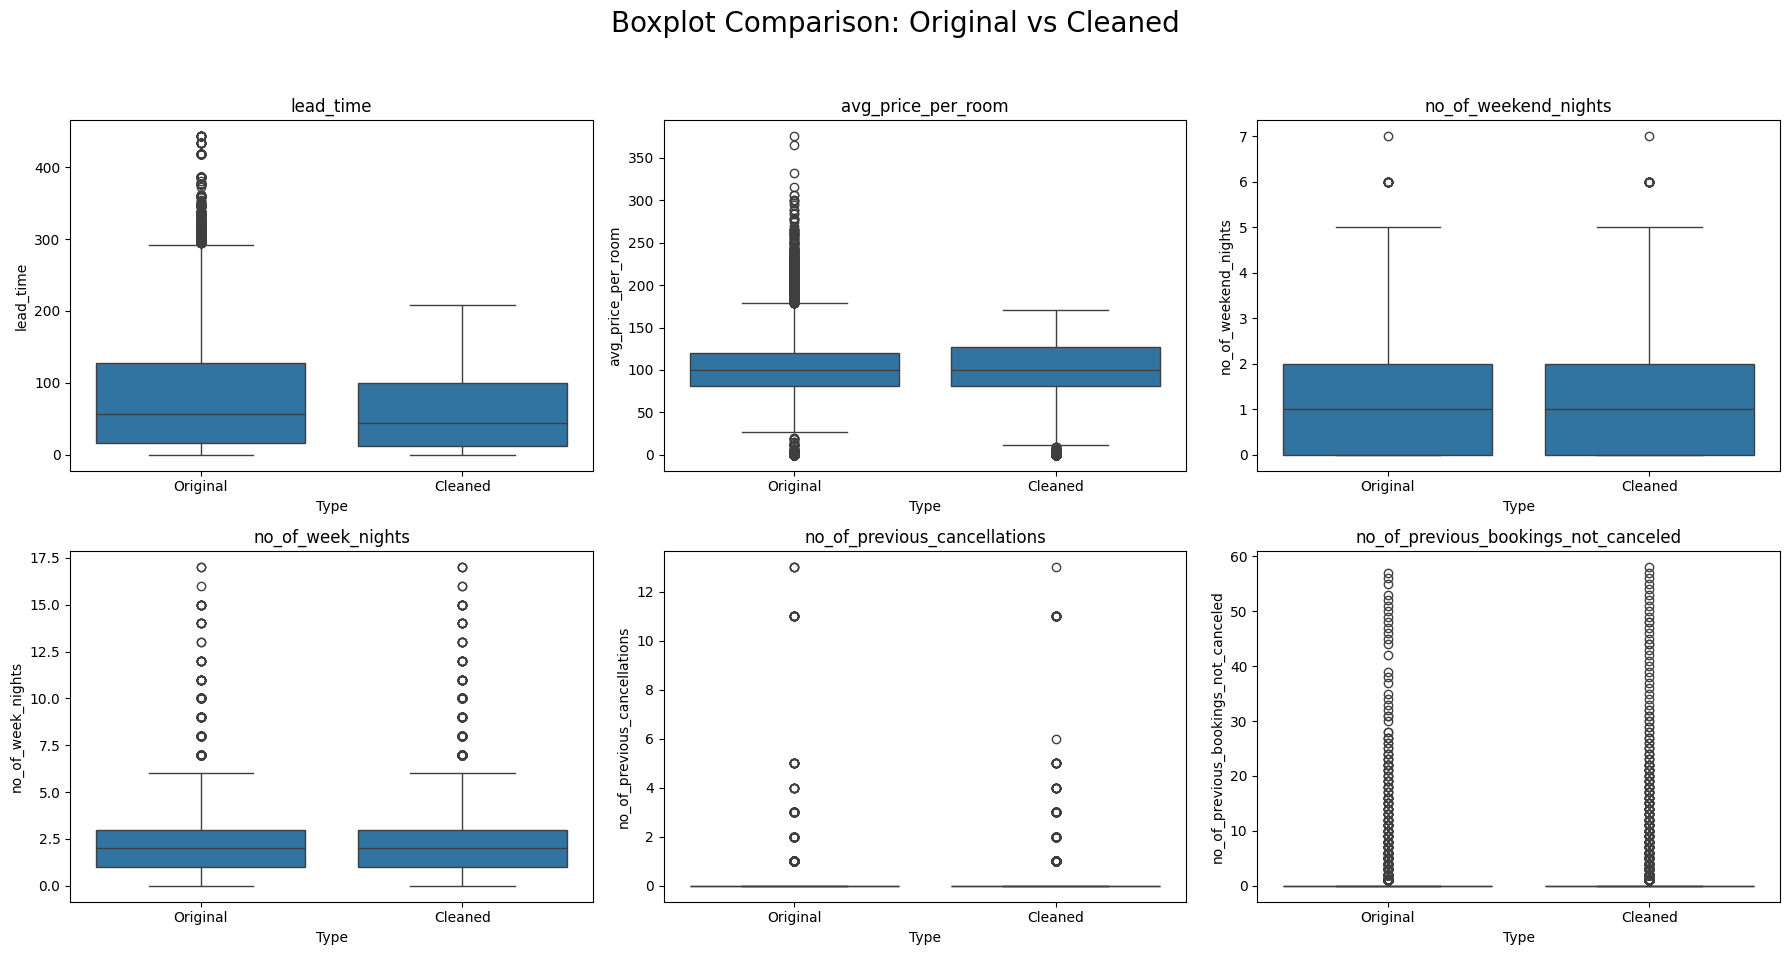

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv("Hotel Reservations.csv")
min_len = min(len(df_original), len(df))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplot Comparison: Original vs Cleaned", fontsize=20)
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    combined = pd.DataFrame({
        col: pd.concat([df_original[col].head(min_len), df[col].head(min_len)], ignore_index=True),
        'Type': ['Original'] * min_len + ['Cleaned'] * min_len
    })
    sns.boxplot(x='Type', y=col, data=combined, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_val = q3 - q1
    lower_bound = q1 - 2.5 * iqr_val
    upper_bound = q3 + 2.5 * iqr_val

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    print(f"\nColumn: {col}")
    print(f"Outliers count after cleaning: {outliers_count}")


Column: lead_time
Outliers count after cleaning: 0

Column: avg_price_per_room
Outliers count after cleaning: 0

Column: no_of_weekend_nights
Outliers count after cleaning: 0

Column: no_of_week_nights
Outliers count after cleaning: 134

Column: no_of_previous_cancellations
Outliers count after cleaning: 269

Column: no_of_previous_bookings_not_canceled
Outliers count after cleaning: 800


**It seems that there are still 3 columns contain outlier ,So I will remove them**

In [ ]:
df['no_of_week_nights'] = np.where(df['no_of_week_nights'] > 8, 8, df['no_of_week_nights'])
df['no_of_previous_cancellations_log'] = np.log1p(df['no_of_previous_cancellations'])
df['no_of_previous_bookings_not_canceled_log'] = np.log1p(df['no_of_previous_bookings_not_canceled'])

for col in ['no_of_previous_cancellations_log', 'no_of_previous_bookings_not_canceled_log']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_val = q3 - q1
    lower_bound = q1 - 2.5 * iqr_val
    upper_bound = q3 + 2.5 * iqr_val
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


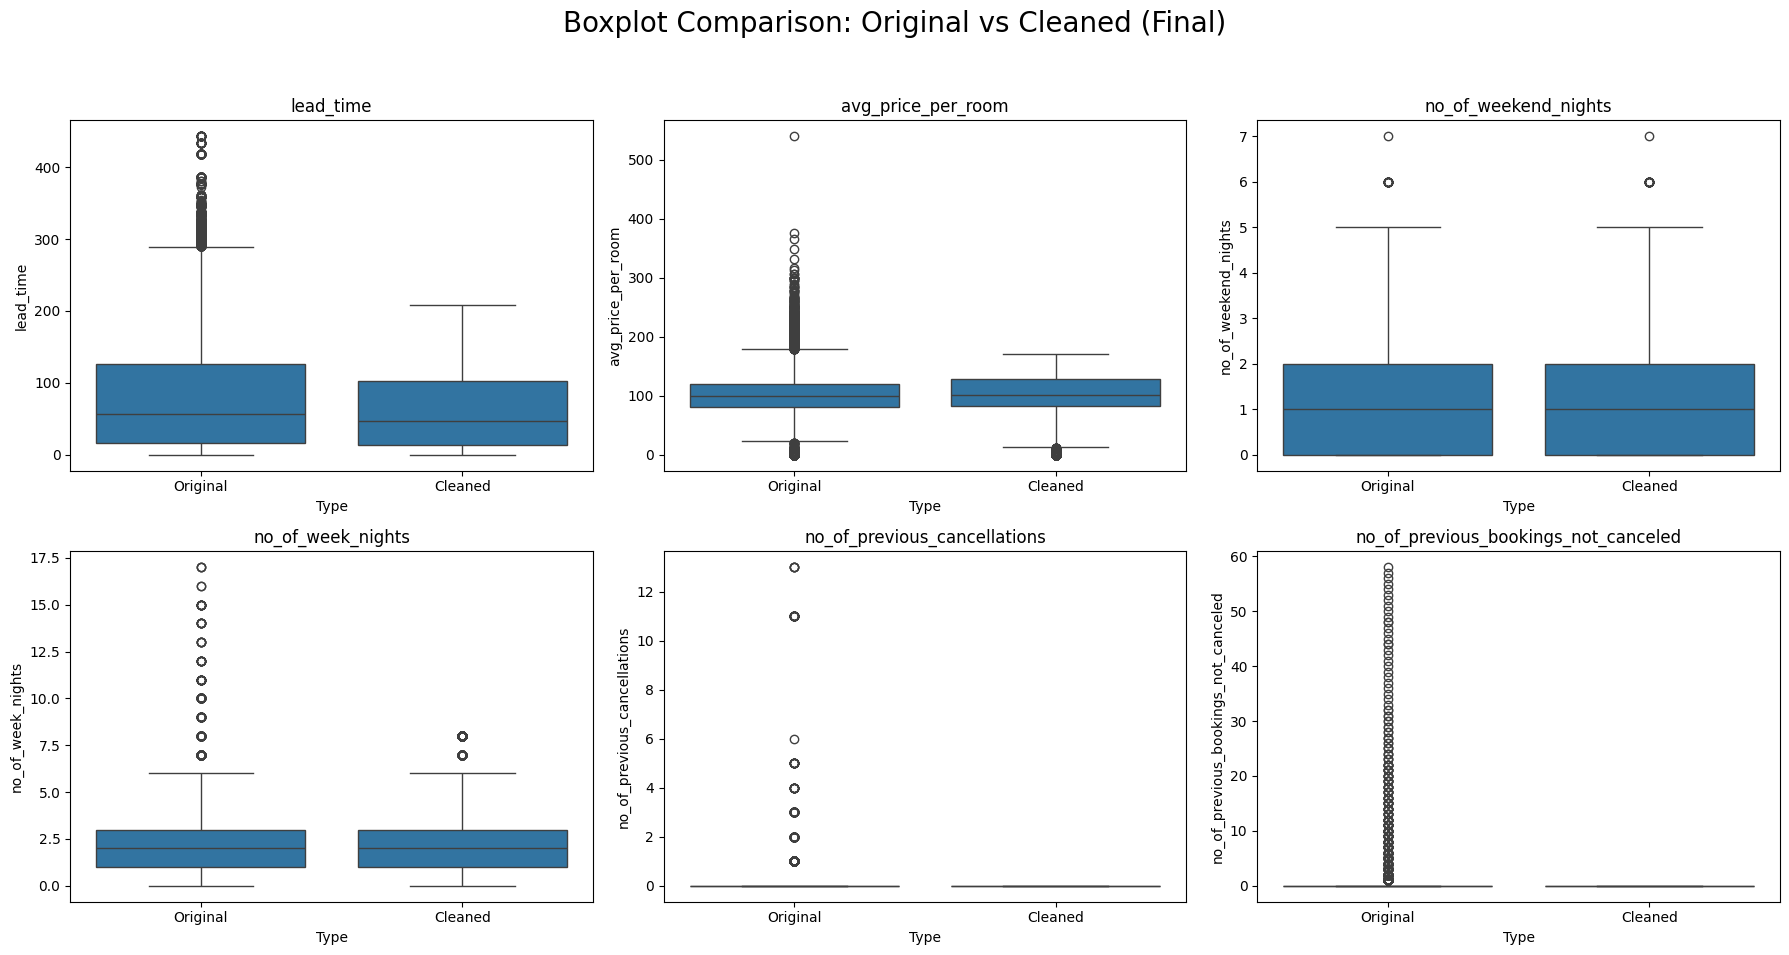

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplot Comparison: Original vs Cleaned (Final)", fontsize=20)
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    combined = pd.DataFrame({
        col: pd.concat([df_original[col], df[col]]),
        'Type': ['Original'] * len(df_original) + ['Cleaned'] * len(df)
    })
    sns.boxplot(x='Type', y=col, data=combined, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_val = q3 - q1
    lower_bound = q1 - 2.5 * iqr_val
    upper_bound = q3 + 2.5 * iqr_val
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    print(f"\nColumn: {col}")
    print(f"Outliers count after final cleaning: {outliers}")


Column: lead_time
Outliers count after final cleaning: 0

Column: avg_price_per_room
Outliers count after final cleaning: 0

Column: no_of_weekend_nights
Outliers count after final cleaning: 0

Column: no_of_week_nights
Outliers count after final cleaning: 0

Column: no_of_previous_cancellations
Outliers count after final cleaning: 0

Column: no_of_previous_bookings_not_canceled
Outliers count after final cleaning: 0


**After Checking ,Successfully removed outliers from all columns**

**Continue Processing Data as remove duplicates,one hot encoding for categorical columns and converting values in  Target column to 0,1**

In [ ]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [ ]:
df.duplicated().sum()

np.int64(43)

In [ ]:
df = df.drop_duplicates()
df.shape

(25105, 20)

**One-Hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)
df = df.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0      208.0          2017             10   
1                           0        5.0          2018             11   
2                           0        1.0          2018              2   
3                           0      208.0          2018              5   
4                           0       48.0          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 30 columns]

In [ ]:
df['booking_status'].value_counts()

booking_status
0    17696
1     7409
Name: count, dtype: int64

# **Correlation between Features:** <a class="anchor" id="8"></a>
[Table of Contents](#0.8)

In [ ]:
cor=df.corr()
cor

no_of_adults  no_of_children  \
no_of_adults                                  1.000000       -0.065925   
no_of_children                               -0.065925        1.000000   
no_of_weekend_nights                          0.070372        0.006247   
no_of_week_nights                             0.097863        0.011771   
required_car_parking_space                    0.031015        0.027773   
lead_time                                     0.144586        0.011628   
arrival_year                                  0.099366        0.030893   
arrival_month                                 0.006482        0.004063   
arrival_date                                  0.018446        0.025356   
repeated_guest                                     NaN             NaN   
no_of_previous_cancellations                       NaN             NaN   
no_of_previous_bookings_not_canceled               NaN             NaN   
avg_price_per_room                            0.313614        0.294078   
no_of_special_requests                        0.152276        0.095124   
booking_status                                0.069183        0.059264   
no_of_previous_cancellations_log                   NaN             NaN   
no_of_previous_bookings_not_canceled_log           NaN             NaN   
type_of_meal_plan_Meal Plan 2                 0.009787        0.028687   
type_of_meal_plan_Meal Plan 3                 0.002119       -0.003916   
type_of_meal_plan_Not Selected               -0.033463       -0.114158   
room_type_reserved_Room_Type 2               -0.117107        0.169993   
room_type_reserved_Room_Type 3               -0.007390       -0.004796   
room_type_reserved_Room_Type 4                0.314803       -0.114576   
room_type_reserved_Room_Type 5               -0.024600        0.002511   
room_type_reserved_Room_Type 6                0.033738        0.651087   
room_type_reserved_Room_Type 7                0.056660        0.117728   
market_segment_type_Complementary            -0.061014        0.006294   
market_segment_type_Corporate                -0.236226       -0.048687   
market_segment_type_Offline                  -0.034507       -0.086801   
market_segment_type_Online                    0.164152        0.101354   

                                          no_of_weekend_nights  \
no_of_adults                                          0.070372   
no_of_children                                        0.006247   
no_of_weekend_nights                                  1.000000   
no_of_week_nights                                     0.196101   
required_car_parking_space                           -0.042797   
lead_time                                             0.133583   
arrival_year                                          0.030415   
arrival_month                                         0.011642   
arrival_date                                          0.002911   
repeated_guest                                             NaN   
no_of_previous_cancellations                               NaN   
no_of_previous_bookings_not_canceled                       NaN   
avg_price_per_room                                   -0.020536   
no_of_special_requests                                0.013055   
booking_status                                        0.062568   
no_of_previous_cancellations_log                           NaN   
no_of_previous_bookings_not_canceled_log                   NaN   
type_of_meal_plan_Meal Plan 2                         0.024181   
type_of_meal_plan_Meal Plan 3                        -0.009174   
type_of_meal_plan_Not Selected                       -0.050879   
room_type_reserved_Room_Type 2                        0.005264   
room_type_reserved_Room_Type 3                       -0.003999   
room_type_reserved_Room_Type 4                        0.039183   
room_type_reserved_Room_Type 5                       -0.005748   
room_type_reserved_Room_Type 6                       -0.002163   
room_type_reserved_Room_Type 7 

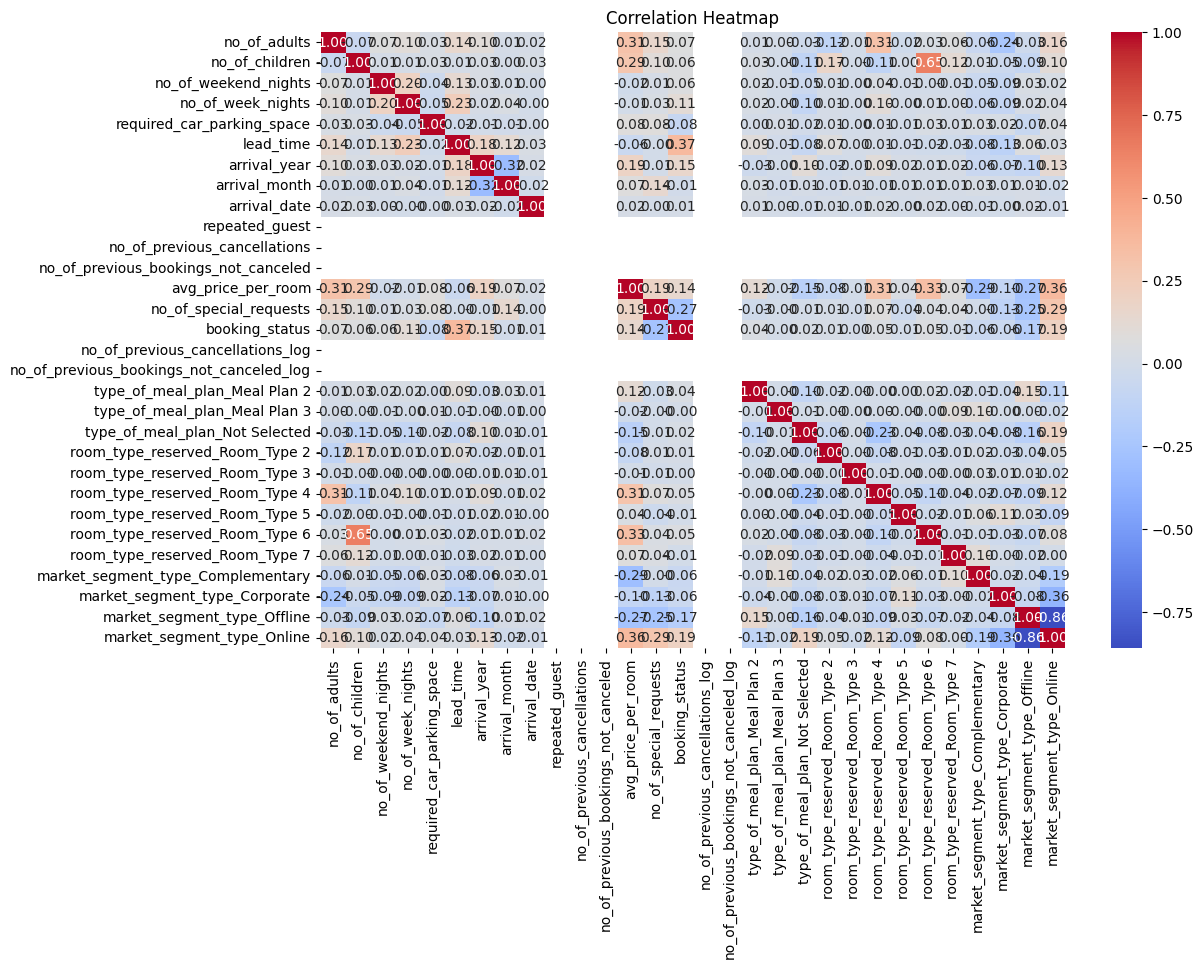

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Features & Target Variables:** <a class="anchor" id="9"></a>
[Table of Contents](#0.9)

In [ ]:
x=df.drop('booking_status',axis=1)
y=df['booking_status']

In [ ]:
x.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0      208.0          2017             10   
1                           0        5.0          2018             11   
2                           0        1.0          2018              2   
3                           0      208.0          2018              5   
4                           0       48.0          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 29 columns]

In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

**splitting data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# **Building Machine Learning Models Without Feature Scaling:** <a class="anchor" id="10"></a>
[Table of Contents](#0.10)

# **First I will use `SVM`,`Logistic Regression` and `Random Forest` models with their default parameters to show the accuracy before applying any technique**

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


In [ ]:
svm=SVC()
log_r=LogisticRegression()
rf=RandomForestClassifier()

**1. SVC Model**

In [ ]:
svc_fit=svm.fit(x_train,y_train)

In [ ]:
svc_pred=svm.predict(x_test)

In [ ]:
print('Training accuracy of SVC Model is :', svc_fit.score(x_train,y_train))
print('Test accuracy of SVC Model is :', svc_fit.score(x_test,y_test))

Training accuracy of SVC Model is : 0.7533147442098674
Test accuracy of SVC Model is : 0.7425650557620818


**2. Logistic Regression**

****

In [ ]:
log_fit=log_r.fit(x_train,y_train)

In [ ]:
log_pred=log_r.predict(x_test)

In [ ]:
print('Training accuracy of Logistic Regression is :', log_fit.score(x_train,y_train))
print('Test accuracy of Logistic Regression is', log_fit.score(x_test,y_test))

Training accuracy of Logistic Regression is : 0.7946850281682126
Test accuracy of Logistic Regression is 0.8027084439723845


**3. Random Forest**

In [ ]:
r_fit=rf.fit(x_train,y_train)

In [ ]:
r_pred=rf.predict(x_test)

In [ ]:
print('Training accuracy of Random Forest :', r_fit.score(x_train,y_train))
print('Test accuracy of Random Forest:', r_fit.score(x_test,y_test))

Training accuracy of Random Forest : 0.9961304273601548
Test accuracy of Random Forest: 0.8572756240042485


# **Features Scaling:** <a class="anchor" id="11"></a>
[Table of Contents](#0.11)

In [ ]:
from sklearn.preprocessing  import StandardScaler,MinMaxScaler,RobustScaler,Normalizer

In [ ]:
#   Standard_Scaler makes the values in range(-3,3)
standard_scaler=StandardScaler()
x_scaled=standard_scaler.fit_transform(x)
new_standard_df=pd.DataFrame(x_scaled,columns=x.columns)
new_standard_df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0          0.167847       -0.310207              0.115800          -0.194568   
1          0.167847       -0.310207              1.239126           0.503735   
2         -1.769528       -0.310207              1.239126          -0.892871   
3          0.167847       -0.310207             -1.007526          -0.194568   
4          0.167847       -0.310207              0.115800          -0.892871   
...             ...             ...                   ...                ...   
25100      0.167847       -0.310207              1.239126          -0.194568   
25101      0.167847        3.954716             -1.007526          -0.892871   
25102      2.105221       -0.310207              1.239126           2.598645   
25103      0.167847       -0.310207              1.239126           2.598645   
25104      0.167847       -0.310207             -1.007526           0.503735   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                       -0.199182   2.310154     -2.385976       0.856722   
1                       -0.199182  -0.984286      0.419116       1.177752   
2                       -0.199182  -1.049202      0.419116      -1.711514   
3                       -0.199182   2.310154      0.419116      -0.748425   
4                       -0.199182  -0.286449      0.419116      -1.069455   
...                           ...        ...           ...            ...   
25100                   -0.199182  -0.935600      0.419116      -1.390484   
25101                   -0.199182  -1.065430      0.419116       0.856722   
25102                   -0.199182   0.314015      0.419116       0.214663   
25103                   -0.199182   1.336428      0.419116      -0.106366   
25104                   -0.199182  -0.043018      0.419116      -1.069455   

       arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0         -1.553863             0.0  ...                       -0.155135   
1         -1.102381             0.0  ...                       -0.155135   
2          1.380770             0.0  ...                       -0.155135   
3          0.477806             0.0  ...                       -0.155135   
4         -0.538029             0.0  ...                       -0.155135   
...             ...             ...  ...                             ...   
25100     -1.328122             0.0  ...                        6.445995   
25101     -1.102381             0.0  ...                       -0.155135   
25102     -1.440993             0.0  ...                       -0.155135   
25103     -1.666734             0.0  ...                       -0.155135   
25104      0.590676             0.0  ...                       -0.155135   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                           -0.015461                       -0.520463   
1                           -0.015461                       -0.520463   
2                           -0.015461                       -0.520463   
3                           -0.015461                       -0.520463   
4                           -0.015461                       -0.520463   
...                               ...                             ...   
25100                       -0.015461                       -0.520463   
25101                       -0.015461                       -0.520463   
25102                       -0.015461                        1.921366   
25103                       -0.015461                       -0.520463   
25104                       -0.015461                       -0.520463   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                           -0.092941                       -0.196136   
1                           -0.092941                       -0.196136   
2                           -0.092941                       -0.196136   
3                           -0.092941  

In [ ]:
#   Min_Max_Scaler makes the values in range(0:1)
mm_scaler=MinMaxScaler()
x_mm_scaled=mm_scaler.fit_transform(x)
new_mm_df=pd.DataFrame(x_mm_scaled,columns=x.columns)
new_mm_df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0              0.50             0.0              0.142857              0.250   
1              0.50             0.0              0.285714              0.375   
2              0.25             0.0              0.285714              0.125   
3              0.50             0.0              0.000000              0.250   
4              0.50             0.0              0.142857              0.125   
...             ...             ...                   ...                ...   
25100          0.50             0.0              0.285714              0.250   
25101          0.50             0.2              0.000000              0.125   
25102          0.75             0.0              0.285714              0.750   
25103          0.50             0.0              0.285714              0.750   
25104          0.50             0.0              0.000000              0.375   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                             0.0   1.000000           0.0       0.818182   
1                             0.0   0.024038           1.0       0.909091   
2                             0.0   0.004808           1.0       0.090909   
3                             0.0   1.000000           1.0       0.363636   
4                             0.0   0.230769           1.0       0.272727   
...                           ...        ...           ...            ...   
25100                         0.0   0.038462           1.0       0.181818   
25101                         0.0   0.000000           1.0       0.818182   
25102                         0.0   0.408654           1.0       0.636364   
25103                         0.0   0.711538           1.0       0.545455   
25104                         0.0   0.302885           1.0       0.272727   

       arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0          0.033333             0.0  ...                             0.0   
1          0.166667             0.0  ...                             0.0   
2          0.900000             0.0  ...                             0.0   
3          0.633333             0.0  ...                             0.0   
4          0.333333             0.0  ...                             0.0   
...             ...             ...  ...                             ...   
25100      0.100000             0.0  ...                             1.0   
25101      0.166667             0.0  ...                             0.0   
25102      0.066667             0.0  ...                             0.0   
25103      0.000000             0.0  ...                             0.0   
25104      0.666667             0.0  ...                             0.0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
25100                             0.0                             0.0   
25101                             0.0                             0.0   
25102                             0.0                             1.0   
25103                             0.0                             0.0   
25104                             0.0                             0.0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0  

In [ ]:
#   Robust_Scaler makes the values in range(-1:1)
robust_scaler=RobustScaler()
x_robust_scaled=robust_scaler.fit_transform(x)
new_robust_df=pd.DataFrame(x_robust_scaled,columns=x.columns)
new_robust_df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0               0.0             0.0                   0.0                0.0   
1               0.0             0.0                   0.5                0.5   
2              -1.0             0.0                   0.5               -0.5   
3               0.0             0.0                  -0.5                0.0   
4               0.0             0.0                   0.0               -0.5   
...             ...             ...                   ...                ...   
25100           0.0             0.0                   0.5                0.0   
25101           0.0             2.0                  -0.5               -0.5   
25102           1.0             0.0                   0.5                2.0   
25103           0.0             0.0                   0.5                2.0   
25104           0.0             0.0                  -0.5                0.5   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                             0.0   1.840909          -1.0            0.4   
1                             0.0  -0.465909           0.0            0.6   
2                             0.0  -0.511364           0.0           -1.2   
3                             0.0   1.840909           0.0           -0.6   
4                             0.0   0.022727           0.0           -0.8   
...                           ...        ...           ...            ...   
25100                         0.0  -0.431818           0.0           -1.0   
25101                         0.0  -0.522727           0.0            0.4   
25102                         0.0   0.443182           0.0            0.0   
25103                         0.0   1.159091           0.0           -0.2   
25104                         0.0   0.193182           0.0           -0.8   

       arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0         -0.933333             0.0  ...                             0.0   
1         -0.666667             0.0  ...                             0.0   
2          0.800000             0.0  ...                             0.0   
3          0.266667             0.0  ...                             0.0   
4         -0.333333             0.0  ...                             0.0   
...             ...             ...  ...                             ...   
25100     -0.800000             0.0  ...                             1.0   
25101     -0.666667             0.0  ...                             0.0   
25102     -0.866667             0.0  ...                             0.0   
25103     -1.000000             0.0  ...                             0.0   
25104      0.333333             0.0  ...                             0.0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
25100                             0.0                             0.0   
25101                             0.0                             0.0   
25102                             0.0                             1.0   
25103                             0.0                             0.0   
25104                             0.0                             0.0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0  

# **Splitting data based on feature scaling techniques**

In [ ]:
# Robust Scaler
X_train_robust,X_test_robust,y_train,y_test=train_test_split(x_robust_scaled,y,test_size=0.3,random_state=42)

In [ ]:
# MinMax Scaler
X_train_mmscaled,X_test_mmscaled,y_train,y_test=train_test_split(x_mm_scaled,y,test_size=0.3,random_state=42)

In [ ]:
# Standard Scaler
X_train_standard,X_test_standard,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

**Train based on Roust Scaler**

In [ ]:
svc_robust=svm.fit(X_train_robust,y_train)
y_pred=svm.predict(X_test_robust)


In [ ]:
print('Training accuracy of SVC using Robust Scaler : ', svc_robust.score(X_train_robust,y_train))
print('Test accuracy of SVC using Robust Scaler : ', svc_robust.score(X_test_robust,y_test))

Training accuracy of SVC using Robust Scaler :  0.843851362886246
Test accuracy of SVC using Robust Scaler :  0.8381571959638874


In [ ]:
log_robust=log_r.fit(X_train_robust,y_train)
y_pred=log_r.predict(X_test_robust)


In [ ]:
print('Training accuracy of Logistic Regression using Robust Scaler : ', log_robust.score(X_train_robust,y_train))
print('Test accuracy of Logistic Regression using Robust Scaler : ', log_robust.score(X_test_robust,y_test))

Training accuracy of Logistic Regression using Robust Scaler :  0.7998634268480055
Test accuracy of Logistic Regression using Robust Scaler :  0.8074880509824748


In [ ]:
rf_robost=rf.fit(X_train_robust,y_train)
y_pred=rf.predict(X_test_robust)

In [ ]:
print('Training accuracy of Random Forest using Robust Scaler:', rf_robost.score(X_train_robust,y_train))
print('Test accuracy of Random Forest using Robust Scaler:', rf_robost.score(X_test_robust,y_test))

Training accuracy of Random Forest using Robust Scaler: 0.9962442383201502
Test accuracy of Random Forest using Robust Scaler: 0.8563462559745088


**Train based on Min Max Scaler**

In [ ]:
svc_mm=svm.fit(X_train_mmscaled,y_train)
y_pred=svm.predict(X_test_mmscaled)


In [ ]:
print('Training accuracy of SVC using Min Max Scaler : ', svc_mm.score(X_train_mmscaled,y_train))
print('Test accuracy of SVC using Min Max Scaler : ', svc_mm.score(X_test_mmscaled,y_test))

Training accuracy of SVC using Min Max Scaler :  0.8212598873271496
Test accuracy of SVC using Min Max Scaler :  0.8194370685077005


In [ ]:
log_mm=log_r.fit(X_train_mmscaled,y_train)
y_pred=log_r.predict(X_test_mmscaled)


In [ ]:
print('Training accuracy of Logistic Regression using Min Max Scaler : ', log_mm.score(X_train_mmscaled,y_train))
print('Test accuracy of Logistic Regression using Min Max Scaler : ', log_mm.score(X_test_mmscaled,y_test))

Training accuracy of Logistic Regression using Min Max Scaler :  0.7999203323280032
Test accuracy of Logistic Regression using Min Max Scaler :  0.806558682952735


In [ ]:
rf_mm=rf.fit(X_train_mmscaled,y_train)
y_pred=rf.predict(X_test_mmscaled)

In [ ]:
print('Training accuracy of Random Forest using Min Max Scaler : ', rf_mm.score(X_train_mmscaled,y_train))
print('Test accuracy of Random Forest using Min Max Scaler : ', rf_mm.score(X_test_mmscaled,y_test))

Training accuracy of Random Forest using Min Max Scaler :  0.9962442383201502
Test accuracy of Random Forest using Min Max Scaler :  0.854089219330855


**Train based on Standard Scaler**

In [ ]:
svc_st=svm.fit(X_train_standard,y_train)
y_pred=svm.predict(X_test_standard)

In [ ]:
print('Training accuracy of SVC using Standard Scaler : ', svc_st.score(X_train_standard,y_train))
print('Test accuracy of SVC using Standard Scaler : ', svc_st.score(X_test_standard,y_test))

Training accuracy of SVC using Standard Scaler :  0.8353155408865873
Test accuracy of SVC using Standard Scaler :  0.8281996813595327


In [ ]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[4835,  417],
       [ 877, 1403]])

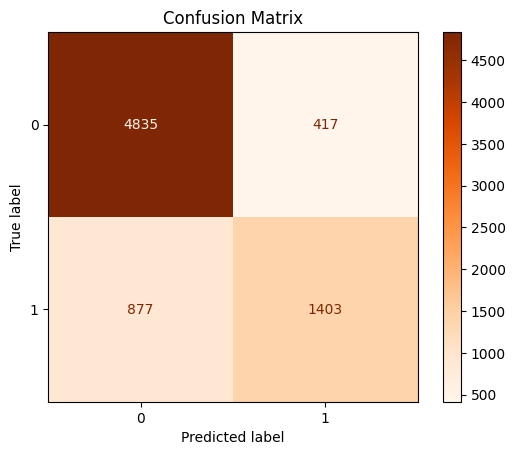

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
log_st=log_r.fit(X_train_standard,y_train)
y_pred=log_r.predict(X_test_standard)


In [ ]:
print('Training accuracy of Logistic Regression using Standard Scaler : ', log_st.score(X_train_standard,y_train))
print('Test accuracy of Logistic Regression using Standard Scaler : ', log_st.score(X_test_standard,y_test))

Training accuracy of Logistic Regression using Standard Scaler :  0.8000910487679963
Test accuracy of Logistic Regression using Standard Scaler :  0.8066914498141264


In [ ]:
rf_st=rf.fit(X_train_standard,y_train)
y_pred=rf.predict(X_test_standard)

In [ ]:
print('Training accuracy of Random Forest using Standard Scaler : ', rf_st.score(X_train_standard,y_train))
print('Test accuracy of Random Forest using Standard Scaler : ', rf_st.score(X_test_standard,y_test))

Training accuracy of Random Forest using Standard Scaler :  0.9961873328401525
Test accuracy of Random Forest using Standard Scaler :  0.8524960169941582


 ---
# **Observation on Models After Feature Scaling:**

**The best feature scaling technique with dataset is `Standard Scaler` and the most suitable model is `SVC` as it gives the highest accuracy with standard scaler and doesn't suffer from overfitting as `Training Accuracy` is `83.5` and `Testing Acuracy` is `82.81`.**

---



# **Fine Tuning the best ML Model:** <a class="anchor" id="12"></a>
[Table of Contents](#0.12)<br>


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid={
    'kernel':['linear','rbf'],
    'C':[0.01,0.1,1,10,100],
}

**1.Apply GridSearch on Features before apply the best scaling techinique which is `Standard Scaler`**

In [ ]:
grid_search=GridSearchCV(estimator=svm,param_grid=params_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print('Best Parameters of SVC :', grid_search.best_params_)
print('Best Score of SVC :', grid_search.best_score_)

Best Parameters of SVC : {'C': 100, 'kernel': 'linear'}
Best Score of SVC : 0.7949129634682162


In [ ]:
best_svc=grid_search.best_estimator_
grid_pred=best_svc.predict(x_test)


In [ ]:
print('Training Accuracy of SVC After Grid Search ',grid_search.score(x_train,y_train))
print('Test Accuracy of SVC After Grid Search ',accuracy_score(grid_pred,y_test))

Training Accuracy of SVC After Grid Search  0.7963352870881466
Test Accuracy of SVC After Grid Search  0.8040361125862985


In [ ]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5252
           1       0.71      0.59      0.65      2280

    accuracy                           0.80      7532
   macro avg       0.77      0.74      0.76      7532
weighted avg       0.80      0.80      0.80      7532



In [ ]:
cm=confusion_matrix(y_test, grid_pred)
cm

array([[4709,  543],
       [ 933, 1347]])

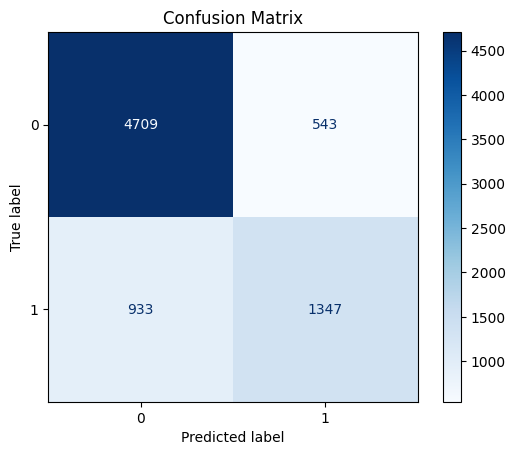

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**2. Apply GridSearch of SVC with the best scaling techinique which is `Standard Scaler`**

In [ ]:
# using the best parameters known from the previous trial of grid serch without scaling features
param_grid={
    'kernel':['linear'],
    'C':[100],
}

In [ ]:
grid_searchh=GridSearchCV(estimator=svm,param_grid=param_grid,cv=5,scoring='accuracy')
grid_searchh.fit(X_train_standard,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100], 'kernel': ['linear']}, scoring='accuracy')

In [ ]:
best_svc=grid_search.best_estimator_
grid_predd=best_svc.predict(X_test_standard)


In [ ]:
print('Training Accuracy of SVC with Standard Scaling ',grid_searchh.score(X_train_standard,y_train))
print('Test Accuracy of SVC with Standard Scaling ',grid_searchh.score(X_test_standard,y_test))

Training Accuracy of SVC with Standard Scaling  0.7984407898480623
Test Accuracy of SVC with Standard Scaling  0.8020446096654275


In [ ]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5252
           1       0.71      0.59      0.65      2280

    accuracy                           0.80      7532
   macro avg       0.77      0.74      0.76      7532
weighted avg       0.80      0.80      0.80      7532



In [ ]:
cm=confusion_matrix(y_test, grid_pred)
cm

array([[4709,  543],
       [ 933, 1347]])

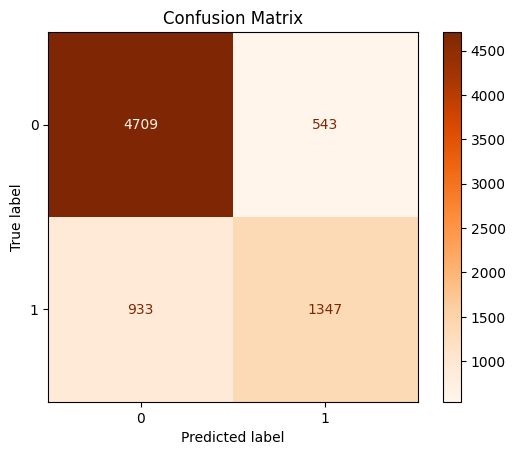

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()

# **Important Note on how accuracy differs in 4 stages for the best model `SVC`:**<ar>

**1.   Using `SVC` with it's defalut parameters and before applying any scaling or change any parameters, gaves the lowest testing accuracy `74.2 %`.**

**2.   Using `SVC` with Standard Scaler which indicates the highest testing accuracy `82.2 % `.**

**3. Using `SVC` with grid search through changing its parameters and uses it's best parameters which are `C=100`,`Kernel=Linear` without yet scaling features, gave accuracy `80.4 %`.**

**4. Using `SVC` with `Standrd Scaler` and with applying grid search through changing its parameters and uses it's best parameters which are `C=100`,`Kernel=Linear` without yet scaling features, gave accuracy `80.2 %`.**

**5. From the confusion Matrix Shown in  previous`3,4 cases` it indicates that scaling features using standard scaler with applying grid search is the same as not scaling the features.**









# **Balancing Target Column Using `SMOTE`:** <a class="anchor" id="13"></a>
[Table of Contents](#0.13)<br>


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train_standard, y_train)

In [ ]:
svm.fit(X_resampled, y_resampled)

SVC()

In [ ]:
y_pred_after_sampling = svm.predict(X_test_standard)


In [ ]:
print('Training Accuracy of SVC After Balancing',svm.score(X_resampled,y_resampled))
print('Test Accuracy of SVC After Balancing',svm.score(X_test_standard,y_test))

Training Accuracy of SVC After Balancing 0.8091449694631951
Test Accuracy of SVC After Balancing 0.7992565055762082


In [ ]:
print(classification_report(y_test,y_pred_after_sampling))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      5252
           1       0.63      0.80      0.71      2280

    accuracy                           0.80      7532
   macro avg       0.77      0.80      0.78      7532
weighted avg       0.82      0.80      0.80      7532



In [ ]:
cm=confusion_matrix(y_test, y_pred_after_sampling)
cm

array([[4190, 1062],
       [ 450, 1830]])

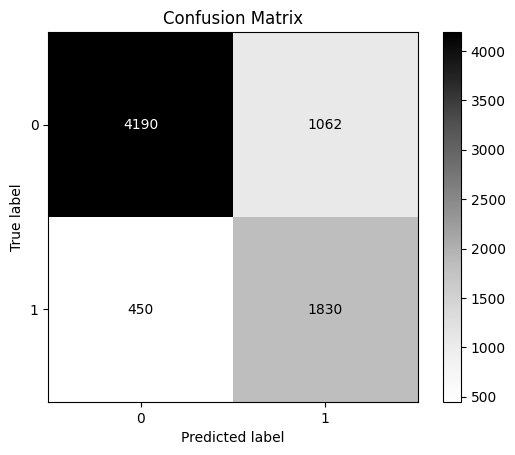

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Grays')
plt.title("Confusion Matrix")
plt.show()

# **After Balancing by oversampling the minority class which was cancelled of `Booking_status` Column :**<ar>
**As shown in confusion matrix,the model became very Baised as it predict `1062` sample as `Cancelled` and they are actually `Not cancelled` Reservations**.



# **Modeling with Feature Selection:** <a class="anchor" id="14"></a>
[Table of Contents](#0.14)<br>




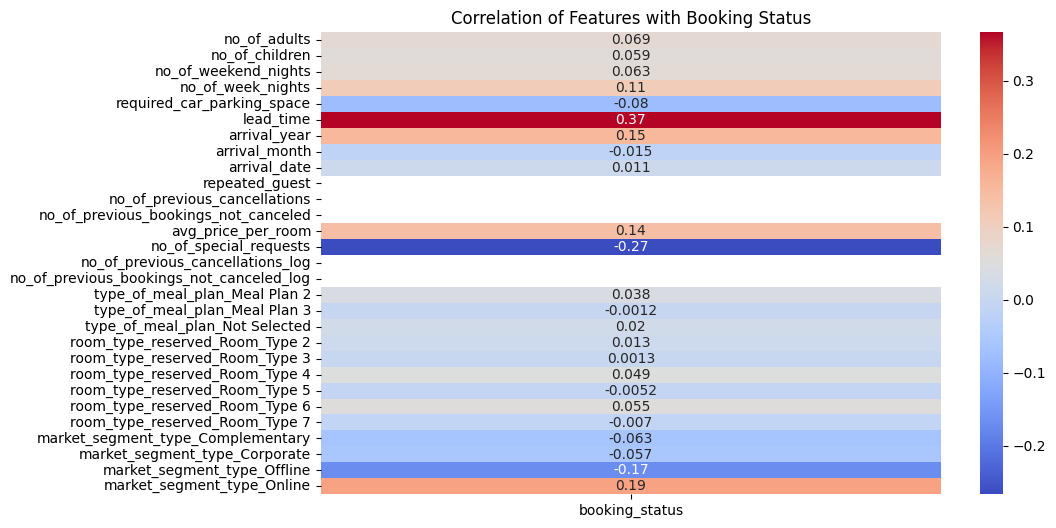

In [ ]:
target_corr = df.corr(numeric_only=True)['booking_status'].drop('booking_status')
plt.figure(figsize=(10, 6))
corr=sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of Features with Booking Status')
plt.show()

In [ ]:
most_correlated = target_corr.abs().sort_values(ascending=False)
most_correlated

lead_time                                   0.366278
no_of_special_requests                      0.266499
market_segment_type_Online                  0.194589
market_segment_type_Offline                 0.169721
arrival_year                                0.154581
avg_price_per_room                          0.143348
no_of_week_nights                           0.110300
required_car_parking_space                  0.079650
no_of_adults                                0.069183
market_segment_type_Complementary           0.062627
no_of_weekend_nights                        0.062568
no_of_children                              0.059264
market_segment_type_Corporate               0.057281
room_type_reserved_Room_Type 6              0.054812
room_type_reserved_Room_Type 4              0.048582
type_of_meal_plan_Meal Plan 2               0.038409
type_of_meal_plan_Not Selected              0.020371
arrival_month                               0.014742
room_type_reserved_Room_Type 2              0.013190
arrival_date                                0.010714
room_type_reserved_Room_Type 7              0.006975
room_type_reserved_Room_Type 5              0.005166
room_type_reserved_Room_Type 3              0.001295
type_of_meal_plan_Meal Plan 3               0.001249
repeated_guest                                   NaN
no_of_previous_cancellations                     NaN
no_of_previous_bookings_not_canceled             NaN
no_of_previous_cancellations_log                 NaN
no_of_previous_bookings_not_canceled_log         NaN
Name: booking_status, dtype: float64

**Showing The most top 10 features correlated with target to be selecting as most important features**



In [ ]:
top_columns = (most_correlated.head(10)).index  # this gets the feature names
x_columns = df[top_columns]
x_columns

lead_time  no_of_special_requests  market_segment_type_Online  \
0          208.0                       0                           0   
1            5.0                       1                           1   
2            1.0                       0                           1   
3          208.0                       0                           1   
4           48.0                       0                           1   
...          ...                     ...                         ...   
36266        8.0                       1                           1   
36269        0.0                       0                           1   
36270       85.0                       1                           1   
36272      148.0                       2                           1   
36273       63.0                       0                           1   

       market_segment_type_Offline  arrival_year  avg_price_per_room  \
0                                1          2017              65.000   
1                                0          2018             106.680   
2                                0          2018              60.000   
3                                0          2018             100.000   
4                                0          2018              94.500   
...                            ...           ...                 ...   
36266                            0          2018              85.960   
36269                            0          2018             170.641   
36270                            0          2018             167.800   
36272                            0          2018              98.390   
36273                            0          2018              94.500   

       no_of_week_nights  required_car_parking_space  no_of_adults  \
0                      2                           0             2   
1                      3                           0             2   
2                      1                           0             1   
3                      2                           0             2   
4                      1                           0             2   
...                  ...                         ...           ...   
36266                  2                           0             2   
36269                  1                           0             2   
36270                  6                           0             3   
36272                  6                           0             2   
36273                  3                           0             2   

       market_segment_type_Complementary  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  
...                                  ...  
36266                                  0  
36269                                  0  
36270                                  0  
36272                                  0  
36273                                  0  

[25105 rows x 10 columns]

In [ ]:
y_target=df['booking_status']

In [ ]:
x_trains,x_tests,y_trains,y_tests=train_test_split(x_columns,y_target,test_size=0.3,random_state=42)

In [ ]:
svm=SVC()
svc_fit=svm.fit(x_trains,y_trains)
svc_pred=svm.predict(x_tests)
print('Training accuracy of SVC Model is :', svc_fit.score(x_trains,y_trains))
print('Test accuracy of SVC Model is :', svc_fit.score(x_tests,y_tests))

Training accuracy of SVC Model is : 0.7580378990496784
Test accuracy of SVC Model is : 0.7490706319702602


**Applying standard scaler**





In [ ]:
standard_scaler=StandardScaler()
x_scaled_features=standard_scaler.fit_transform(x_columns)
new_standard_dfs=pd.DataFrame(x_scaled_features,columns=x_columns.columns)
new_standard_dfs

lead_time  no_of_special_requests  market_segment_type_Online  \
0       2.310154               -0.915691                   -1.954128   
1      -0.984286                0.311013                    0.511737   
2      -1.049202               -0.915691                    0.511737   
3       2.310154               -0.915691                    0.511737   
4      -0.286449               -0.915691                    0.511737   
...          ...                     ...                         ...   
25100  -0.935600                0.311013                    0.511737   
25101  -1.065430               -0.915691                    0.511737   
25102   0.314015                0.311013                    0.511737   
25103   1.336428                1.537717                    0.511737   
25104  -0.043018               -0.915691                    0.511737   

       market_segment_type_Offline  arrival_year  avg_price_per_room  \
0                         2.274725     -2.385976           -1.216236   
1                        -0.439614      0.419116            0.030580   
2                        -0.439614      0.419116           -1.365806   
3                        -0.439614      0.419116           -0.169245   
4                        -0.439614      0.419116           -0.333772   
...                            ...           ...                 ...   
25100                    -0.439614      0.419116           -0.589238   
25101                    -0.439614      0.419116            1.943910   
25102                    -0.439614      0.419116            1.858925   
25103                    -0.439614      0.419116           -0.217407   
25104                    -0.439614      0.419116           -0.333772   

       no_of_week_nights  required_car_parking_space  no_of_adults  \
0              -0.194568                   -0.199182      0.167847   
1               0.503735                   -0.199182      0.167847   
2              -0.892871                   -0.199182     -1.769528   
3              -0.194568                   -0.199182      0.167847   
4              -0.892871                   -0.199182      0.167847   
...                  ...                         ...           ...   
25100          -0.194568                   -0.199182      0.167847   
25101          -0.892871                   -0.199182      0.167847   
25102           2.598645                   -0.199182      2.105221   
25103           2.598645                   -0.199182      0.167847   
25104           0.503735                   -0.199182      0.167847   

       market_segment_type_Complementary  
0                              -0.096788  
1                              -0.096788  
2                              -0.096788  
3                              -0.096788  
4                              -0.096788  
...                                  ...  
25100                          -0.096788  
25101                          -0.096788  
25102                          -0.096788  
25103                          -0.096788  
25104                          -0.096788  

[25105 rows x 10 columns]

In [ ]:
X_train_standards,X_test_standards,y_trainss,y_testss=train_test_split(x_scaled_features,y_target,test_size=0.3,random_state=42)

In [ ]:
svc_st=svm.fit(X_train_standards,y_trainss)
y_pred=svm.predict(X_test_standards)
print('Training accuracy of SVC using Standard Scaler : ', svc_st.score(X_train_standards,y_trainss))
print('Test accuracy of SVC using Standard Scaler : ', svc_st.score(X_test_standards,y_testss))


Training accuracy of SVC using Standard Scaler :  0.8280885449268764
Test accuracy of SVC using Standard Scaler :  0.8275358470525757


In [ ]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[4773,  479],
       [ 820, 1460]])

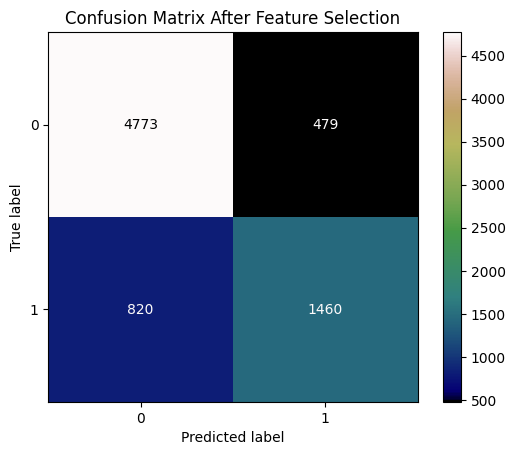

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='gist_earth')
plt.title("Confusion Matrix After Feature Selection")
plt.show()



# **Conclusion:** <a class="anchor" id="15"></a>
[Table of Contents](#0.15)<br>


**Throughout this analytical journey, we explored a comprehensive pipeline to optimize model performance:**

    1. Feature Scaling: Tested StandardScaler, MinMaxScaler, and RobustScaler across models, revealing StandardScaler as the most effective (82.2% accuracy with SVM).

    2. Class Balancing: Applied advanced techniques to address imbalance, yet performance capped at 80% accuracy, underscoring the limitations of balancing alone.

    3. Grid Search CV: Exhaustively tuned hyperparameters, but no significant accuracy boost emerged, highlighting diminishing returns post-robust scaling.

**The Breakthrough:** <br>
By prioritizing feature selection—retaining only the top 10 most relevant features—we distilled the dataset to its most informative components. Pairing this with SVM and StandardScaler, we achieved 83% accuracy, outperforming all prior configurations.


**Final Model:**
**[SVM + StandardScaler + Top 10 Features] ➔ 83% Accuracy**.<br>
This journey reaffirms that thoughtful feature engineering often outweighs brute-force complexity.